In [1]:
import starsim as ss

Starsim 2.0.0 (2024-10-01) — © 2023-2024 by IDM


In [2]:
import sciris as sc

In [6]:
# Set the parameters for the baseline simulation
pars1 = sc.objdict( # Note: can also use regular Python dictionary
	n_agents = 10_000,     # Number of agents to simulate
	networks = sc.objdict( # *Networks* add detail on how the agents interact with each other
		type = 'random',   # Here, we use a 'random' network
		n_contacts = 4     # Each person has an average of 4 contacts with other people
	),
	diseases = sc.objdict( # *Diseases* add detail on what diseases to model
		type = 'sis',      # Here, we're creating an SIS disease
		init_prev = 0.1,   # Proportion of the population initially infected
		beta = 0.1,        # Probability of transmission between contacts
	)
)

Initializing sim "High transmission" with 10000 agents
Initializing sim "Low transmission" with 10000 agents
  Running "High transmission": 2000.0 ( 0/51) (0.00 s)  ———————————————————— 2%
  Running "Low transmission": 2000.0 ( 0/51) (0.00 s)  ———————————————————— 2%


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'rvs_list' of function 'multi_random.combine_rvs'.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File ".local/lib/python3.11/site-packages/starsim/distributions.py", line 1197:
    @nb.njit(fastmath=True, parallel=False, cache=True) # Numba is 3x faster, but disabling parallel for efficiency
    def combine_rvs(rvs_list, int_type, int_max):
    ^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))
/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/numba/core/ir_utils.py:2149: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'rvs_l

  Running "High transmission": 2010.0 (10/51) (1.30 s)  ••••———————————————— 22%
  Running "Low transmission": 2010.0 (10/51) (1.30 s)  ••••———————————————— 22%
  Running "High transmission": 2020.0 (20/51) (1.38 s)  ••••••••———————————— 41%
  Running "Low transmission": 2020.0 (20/51) (1.38 s)  ••••••••———————————— 41%
  Running "High transmission": 2030.0 (30/51) (1.45 s)  ••••••••••••———————— 61%
  Running "Low transmission": 2030.0 (30/51) (1.45 s)  ••••••••••••———————— 61%
  Running "High transmission": 2040.0 (40/51) (1.52 s)  ••••••••••••••••———— 80%

  Running "High transmission": 2050.0 (50/51) (1.63 s)  •••••••••••••••••••• 100%



Elapsed time: 3.98 s


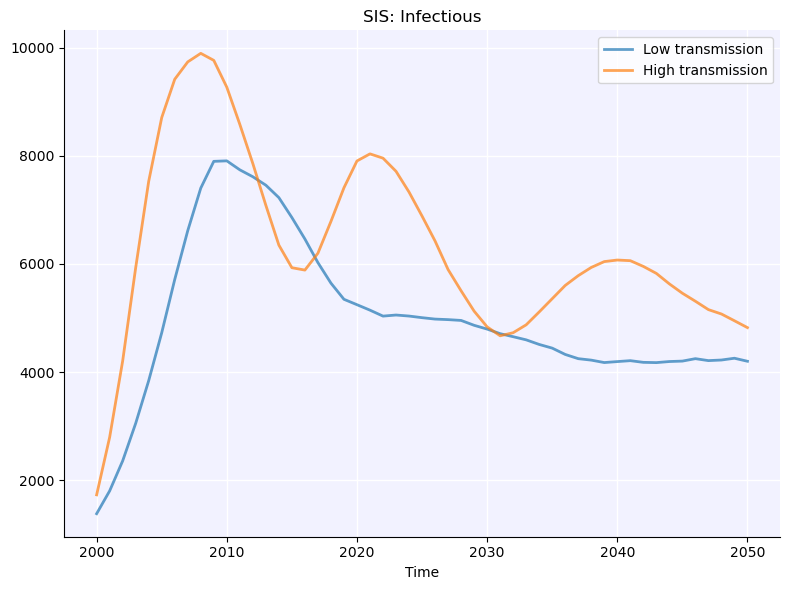

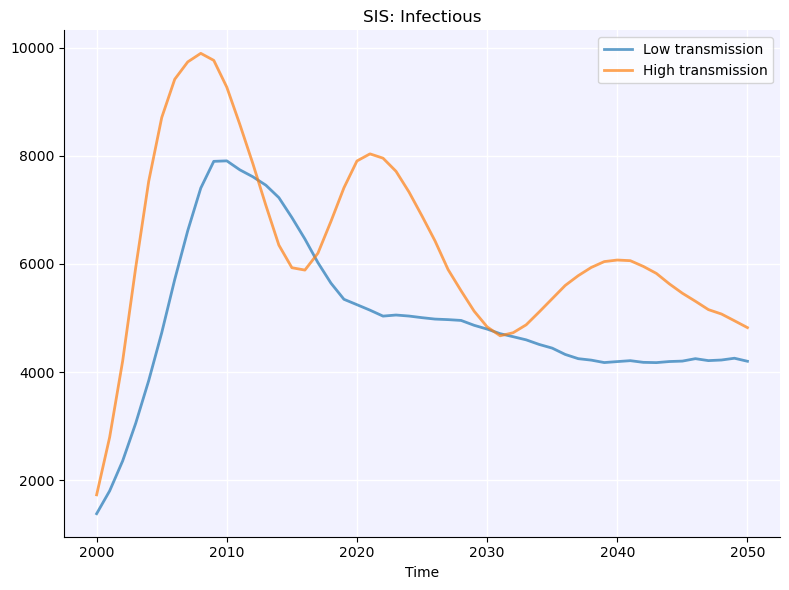

In [8]:
# Make a modified version of the parameters for the scenario
pars2 = pars1.copy(deep=True)
pars2.diseases.beta = 0.2

# Create the simulations
s1 = ss.Sim(pars1, label='Low transmission')
s2 = ss.Sim(pars2, label='High transmission')

# Run and plot the simulations
msim = ss.parallel(s1, s2)
msim.plot('sis_n_infected')